In [1]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
# import numpy as np
# import geopandas as gp
# import datetime
import math
import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)
from palettable.colorbrewer.qualitative import Paired_11

PWD = os.getenv('PWD') # ipython shoud be started in the **Square_city_time** folder

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# I. Reading and parsing the data

In [7]:
def getAllFinished(mypath):
    '''read all datasets in the folder and
    create a dictionary, using file names'''
    
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k)).dropna(how='all')[cols] for k in files}

In [8]:
dfs = getAllFinished(PWD +'/data/finished_data/')

In [9]:
def convertDT(df):
    '''paprse dates in dataset'''
    df['createdAt'] = pd.to_datetime(df['createdAt'], yearfirst=1,errors='coerce')
    return df

In [10]:
# parse time in all datasets

for k in dfs:
    dfs[k] =convertDT(dfs[k])

In [11]:
# what datasets we have?

dfs.keys()

['New_York',
 'Tokyo',
 'Kiev',
 'Mumbai',
 'Moscow',
 'Shanghai',
 'Minsk',
 'Singapur',
 'San Francisco']

# I. General Timeline

In [12]:
def plotTS(dfs):
    '''plots cumsum timeline of all cities'''
    fig, ax = plt.subplots(figsize=(10,10))
    
    names = []
    for i, (name, city) in enumerate(dfs.iteritems()):
        names.append(name)
        ts = city[['createdAt','ID']].set_index('createdAt').resample('1W', how='count').cumsum()
        ts = ts/ts.max()

        ts.plot(ax=ax, label=name, color=Paired_11.mpl_colors[i])
        
        ax.set_yticklabels([])
        ax.set_yticks([])
    plt.legend(names, loc='best')

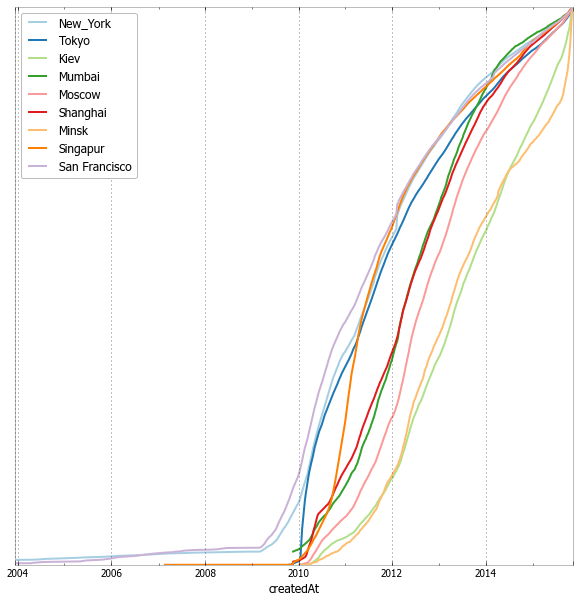

In [13]:
plotTS(dfs)
plt.savefig(PWD +'/img/timeline_all.png', bbox_inches='tight')

In [60]:
def plotCityTS(cName, dfs, ax):
    '''plots cumsum timeline of all cities'''
    
    
    names = []
    for i, (name, group) in enumerate(dfs[cName].groupby('genCategory')):
        ts = group[['createdAt','ID']].set_index('createdAt').resample('1W', how='count').cumsum()
        ts = ts/ts.max()
        names.append(name)

        ts.plot(ax=ax, label=name, color=Paired_11.mpl_colors[i], alpha=.5)
        
#     ax.set_yticklabels([])
#     ax.set_yticks([])
    ax.set_ylabel('venues, %')
    ax.set_xlabel('Creation date')
    ax.set_title(cName)
    ax.legend(names, loc='best')
    

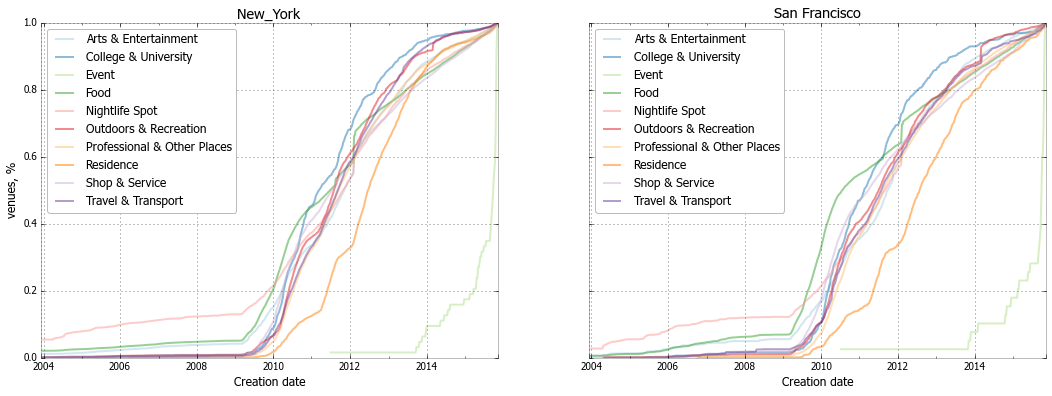

In [61]:
fig, axes = plt.subplots(1,2, figsize=(18,6), sharex='all',sharey='all')

plotCityTS('New_York', dfs, axes[0])
plotCityTS('San Francisco', dfs, axes[1])

plt.savefig(PWD +'/img/cat_timeline_SF_NY.png', bbox_inches='tight')

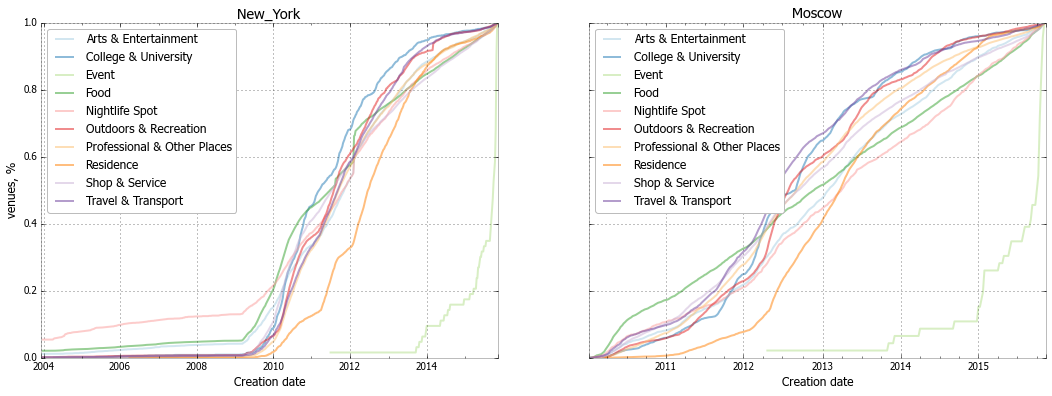

In [62]:
fig, axes = plt.subplots(1,2, figsize=(18,6),sharey='all')

plotCityTS('New_York', dfs, axes[0])
plotCityTS('Moscow', dfs, axes[1])

plt.savefig(PWD +'/img/cat_timeline_NY_Mo.png', bbox_inches='tight')

In [25]:
def corrTS(dfs):
    ts= {}
    
    for name, df in dfs.itetitems():
        z = df[['createdAt','ID']]
        ts[name] = 
    
    
    

In [26]:
corrTS(dfs)

<type 'tuple'>
